The goal of this notebook is to plot the data corresponding to the weight for each day.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Given that the format of each file is different, I'll have different data preprocessing for each file.

In [2]:
normal_files=['/home/pedranji/Projects/weightData/data/jpg/7673.txt', '/home/pedranji/Projects/weightData/data/jpg/7674.txt', '/home/pedranji/Projects/weightData/data/jpg/7675.txt', '/home/pedranji/Projects/weightData/data/jpg/7676.txt', '/home/pedranji/Projects/weightData/data/jpg/7677.txt', '/home/pedranji/Projects/weightData/data/jpg/7678.txt', '/home/pedranji/Projects/weightData/data/jpg/7679.txt']

data = []
for file in normal_files:
    print(file)
    with open(file) as f:
        curr_file = f.readlines()
        curr_file = [x.split(" ") for x in curr_file]
        data.append(curr_file)

data = [item for sublist in data for item in sublist]


/home/pedranji/Projects/weightData/data/jpg/7673.txt
/home/pedranji/Projects/weightData/data/jpg/7674.txt
/home/pedranji/Projects/weightData/data/jpg/7675.txt
/home/pedranji/Projects/weightData/data/jpg/7676.txt
/home/pedranji/Projects/weightData/data/jpg/7677.txt
/home/pedranji/Projects/weightData/data/jpg/7678.txt
/home/pedranji/Projects/weightData/data/jpg/7679.txt


In [3]:
df = pd.DataFrame(data)
df.columns = ["Date", "Weight"]



# Remove all things from weight that are not numeric or .
df['Weight'] = df['Weight'].str.replace(r'[^0-9/.]', '', regex=True)

# Remove all things from date that are not numeric or /
df['Date'] = df['Date'].str.replace(r'[^0-9/]', '', regex=True)

# convert - and null values to nan
df["Weight"] = df["Weight"].replace("", np.nan)
df["Weight"] = df["Weight"].astype(float)

# To date
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m")

# Replace year with 2023
df["Date"] = df["Date"].apply(lambda x: x.replace(year=2023))


In [4]:
# set the date to a datetime object
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m")

# set the year to 2023
df["Date"] = df["Date"].apply(lambda x: x.replace(year=2023))

# sort the rows by date
df = df.sort_values(by="Date")

# convert the weight to a float
df["Weight"] = df["Weight"].astype(float)
df.head()

,Date,Weight
0,2023-02-26,71.0
1,2023-02-27,71.9
2,2023-02-28,72.1
3,2023-03-01,70.9
4,2023-03-03,70.8


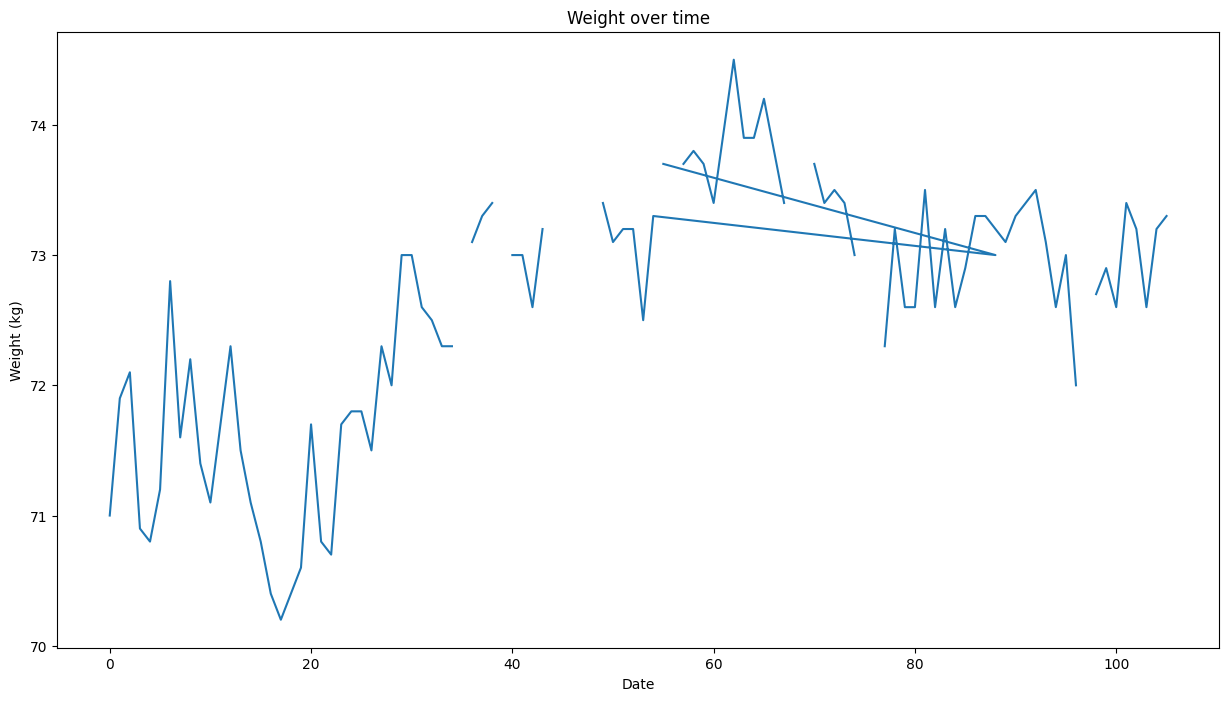

In [5]:
# plot the data
plt.figure(figsize=(15, 8))
plt.plot(df.index, df["Weight"])
plt.title("Weight over time")
plt.xlabel("Date")
plt.ylabel("Weight (kg)")
plt.show()

In [6]:
other_files = ['/home/pedranji/Projects/weightData/data/jpg/7680.txt', '/home/pedranji/Projects/weightData/data/jpg/7681.txt', '/home/pedranji/Projects/weightData/data/jpg/7682.txt', '/home/pedranji/Projects/weightData/data/jpg/7683.txt', '/home/pedranji/Projects/weightData/data/jpg/7684.txt']

data_from_files = []
# Read the data from the text file
for file_path in other_files:
    with open(file_path, 'r') as file:
        data_from_files.append(file.read())

# Split the data into lines and remove any leading/trailing whitespace
for i in range(len(data_from_files)):
    data_from_files[i] = data_from_files[i].split('\n')
    data_from_files[i] = [line.strip() for line in data_from_files[i]]


# Initialize lists to store the preprocessed data
# it doesn't matter in which list I put each entry, only that the date and weight for each entry are in the same list
# I will merge them later
dates1 = []
weights1 = []
dates2 = []
weights2 = []

# Iterate through the lines and split them into date and weight pairs
# Iterate through the lines and split them into date and weight pairs
for lines in data_from_files:
    for line in lines:
        parts = line.split()
        
        if len(parts) == 4:
            date1, weight1, date2, weight2 = parts
            dates1.append(date1)
            weights1.append(weight1)
            dates2.append(date2)
            weights2.append(weight2)
        elif len(parts) == 2:
            date1, weight1 = parts
            dates1.append(np.nan)
            weights1.append(np.nan) 
            dates2.append(date1)     
            weights2.append(weight1) 
        elif len(parts) == 3:
            # The way that my data is formatted, I know that the only thing that can be missing is a weight for a date
            # So, there are two cases. The first is that the first date and weight are ok, and the weight is missing for the 2nd
            # the other case is that the first date is ok but its weight is missing, and the second date and weight are ok.
            # I can check which case it is by checking if the first part is a date or not.

            # Case 1: the 2nd weight is missing
            if "/" in parts[2]:
                date1, weight1, date2 = parts
                dates1.append(date1)
                weights1.append(weight1)
                dates2.append(date2)
                weights2.append(np.nan)
            # Case 2: the 1st weight is missing
            elif "/" in parts[1]:
                date1, date2, weight2 = parts
                dates1.append(date1)
                weights1.append(np.nan)
                dates2.append(date1)
                weights2.append(weight2)


    
# Create a DataFrame with the preprocessed data
df2 = pd.DataFrame({
    'Date1': dates1,
    'Weight1': weights1,
    'Date2': dates2,
    'Weight2': weights2
})

# Remove missing values (e.g., '-')
df2.replace('-', np.nan, inplace=True)

# Convert the date columns to a consistent format (e.g., 'DD/MM')
df2['Date1'] = pd.to_datetime(df2['Date1'], format='%d/%m', errors='coerce')
df2 = pd.DataFrame({
    'Date1': dates1,
    'Weight1': weights1,
    'Date2': dates2,
    'Weight2': weights2
})



In [7]:

# Remove missing values (e.g., '-')
df2.replace('-', np.nan, inplace=True)

all_entries = []
for index, row in df2.iterrows():
    if pd.notna(row['Date1']):
        all_entries.append((row['Date1'], row['Weight1']))
    if pd.notna(row['Date2']):
        all_entries.append((row['Date2'], row['Weight2']))

df2 = pd.DataFrame(all_entries, columns=['Date', 'Weight'])

# Set date to datetime
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m', errors='coerce')

# Set year to 2023
df2['Date'] = df2['Date'].apply(lambda x: x.replace(year=2023))

# remove non numeric things from weight
df2["Weight"] = df2["Weight"].str.replace(r'[^0-9/.]', '', regex=True)

# replace empty values to nan
df2["Weight"] = df2["Weight"].replace("", np.nan)

# convert the weight to a float
df2["Weight"] = df2["Weight"].astype(float)

# sort by date
df2 = df2.sort_values(by="Date")


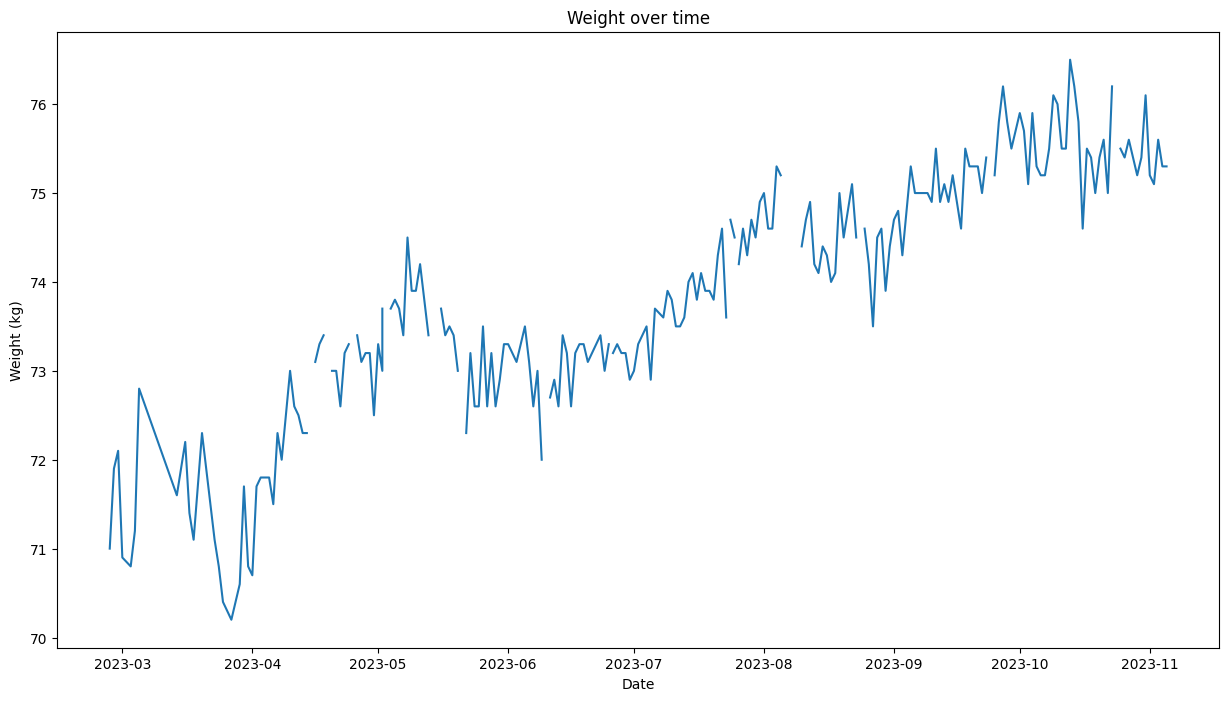

In [8]:
# merge df and df2
df = pd.concat([df, df2])

# sort the rows by date
df = df.sort_values(by="Date")

# set the index to the date
df = df.set_index("Date")

# plot the data
plt.figure(figsize=(15, 8))
plt.plot(df.index, df["Weight"])
plt.title("Weight over time")
plt.xlabel("Date")
plt.ylabel("Weight (kg)")
plt.show()